# Algoritmo DBSCAN

## Imports

In [1]:
# importamos las librerias y bibliotecas que utilizaremos para el algoritmo DBSCAN
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from pandas import DataFrame
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

## Funciones auxiliares

In [2]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## Lectura del conjunto de datos

In [3]:
df_ini = pd.read_csv('dataset-equilibrado-3.csv')

## Visualización del conjunto de datos

In [4]:
df_ini.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
1,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
2,72898,Female,67.0,1,1,Yes,Private,Rural,199.24,33.9,never smoked,1
3,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
5,72836,Female,59.0,0,0,Yes,Private,Urban,65.98,31.1,Unknown,0
6,72824,Male,46.0,0,0,Yes,Private,Rural,59.05,28.3,formerly smoked,0
7,72823,Female,79.0,0,0,Yes,Private,Urban,70.35,23.0,formerly smoked,0
8,72779,Female,14.0,0,0,No,children,Urban,131.77,31.0,Unknown,0
9,72672,Female,50.0,0,0,Yes,Private,Rural,132.35,25.6,smokes,1


In [5]:
#Validamos la cantidad de ejemplos que posee el dataset
df_ini["stroke"].value_counts()

0    1600
1     783
Name: stroke, dtype: int64

## Primera preparación del conjunto de datos

In [6]:
#Eliminamos datos que son irrelevantes y que podrian alterar el comportamiento del algoritmo
df_ini = df_ini.drop(["id"], axis=1)

In [7]:
#Función para transformar las columnas categoricas a numericas
df= pd.get_dummies(df_ini, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [8]:
#Validamos que los cambios se aplicarón correctamente 
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,53.0,1,0,62.55,30.3,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,57.0,1,0,129.54,60.9,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,67.0,1,1,199.24,33.9,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,47.0,0,0,75.30,25.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,52.0,0,0,69.30,20.1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,80.0,0,0,84.86,NaN,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2379,24.0,0,0,97.55,26.2,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2380,31.0,0,0,108.89,52.3,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2381,55.0,0,0,89.17,31.5,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

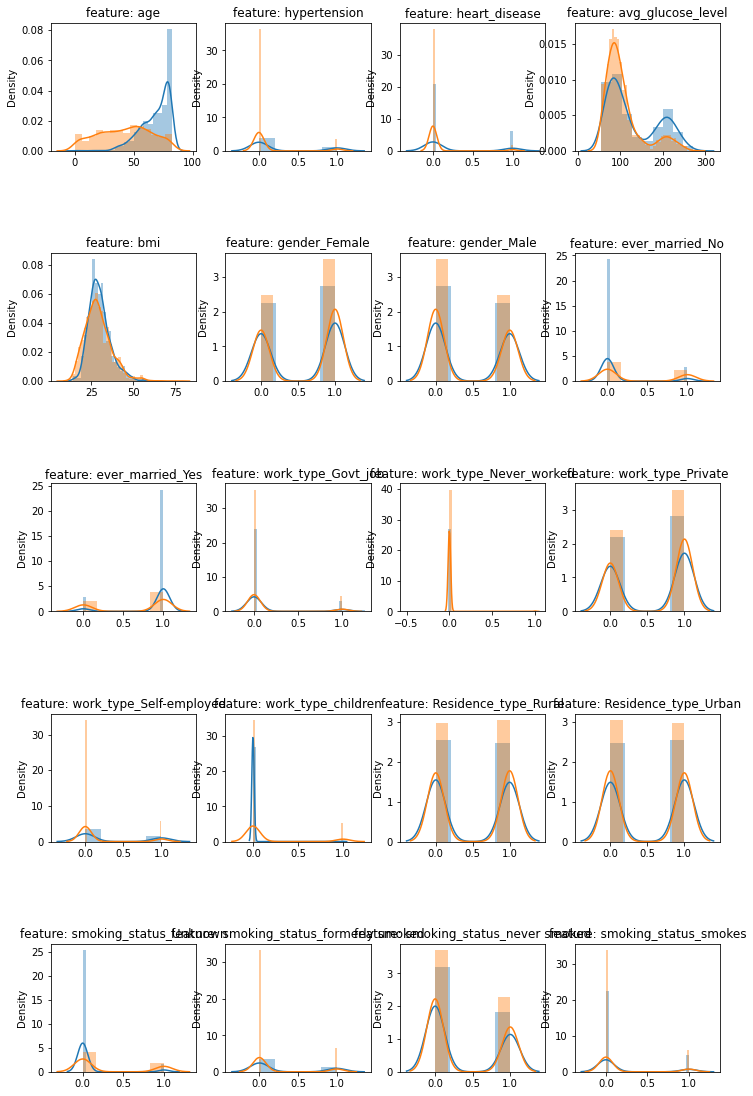

In [9]:
# Representamos gráficamente las características
features = df.drop("stroke", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["stroke"] == 1])
    sns.distplot(df[f][df["stroke"] == 0])
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

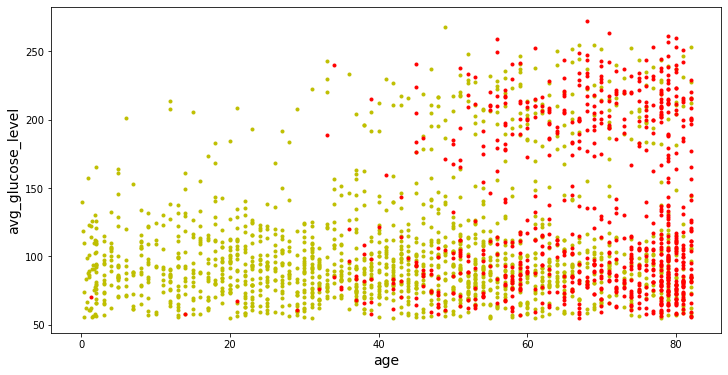

In [10]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 6))
plt.scatter(df["age"][df['stroke'] == 0], df["avg_glucose_level"][df['stroke'] == 0], c="y", marker=".")
plt.scatter(df["age"][df['stroke'] == 1], df["avg_glucose_level"][df['stroke'] == 1], c="r", marker=".")
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

## DBSCAN con un conjunto de datos de dos dimensiones

In [11]:
X_2 = df[["age", "avg_glucose_level"]].copy()
y = df["stroke"].copy()
X_2

,age,avg_glucose_level
0,53.0,62.55
1,57.0,129.54
2,67.0,199.24
3,47.0,75.30
4,52.0,69.30
...,...,...
2378,80.0,84.86
2379,24.0,97.55
2380,31.0,108.89
2381,55.0,89.17


In [12]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [13]:
# Rellenamos los valores nulos
X = num_pipeline.fit_transform(X_2)

In [14]:
# Transformamos el resultado a un DataFrame de Pandas
X = pd.DataFrame(X, columns=X_2.columns, index=y.index)

In [15]:
#Validamos que los cambios se aplicaron correctamente 
X

,age,avg_glucose_level
0,-0.027778,-0.658383
1,0.083333,0.729005
2,0.361111,2.172517
3,-0.194444,-0.394325
4,-0.055556,-0.518588
...,...,...
2378,0.722222,-0.196334
2379,-0.833333,0.066480
2380,-0.638889,0.301336
2381,0.027778,-0.107073


In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=13)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=13)

In [17]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="y", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="x")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

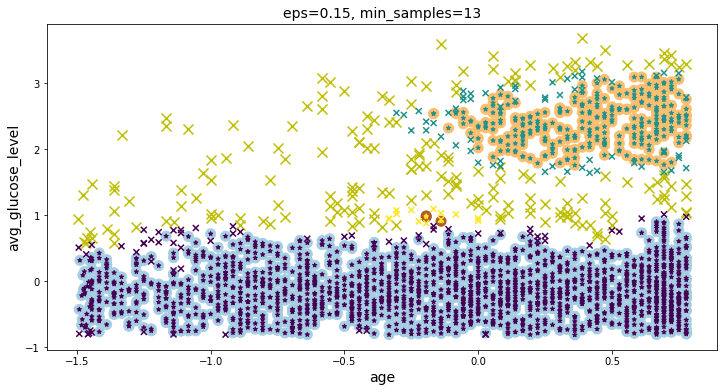

In [18]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X.values, size=100)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

In [19]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are stroke samples".format(
        key, counter[key], bad_counter[key]))

Label -1 has 189 samples - 63 are stroke samples
Label 0 has 1829 samples - 504 are stroke samples
Label 1 has 349 samples - 215 are stroke samples
Label 2 has 16 samples - 1 are stroke samples


## Reducción del número de características

### Segunda preparación del conjunto de datos

In [20]:
X_df = df.drop("stroke", axis=1)
y_df = df["stroke"].copy()

In [21]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [22]:
# Rellenamos los valores nulos
X = num_pipeline.fit_transform(X_df)

In [23]:
# Transformamos el resultado a un DataFrame de Pandas
X = pd.DataFrame(X, columns=X_df.columns, index=y_df.index)

In [24]:
#Validamos que los cambios se aplicaron correctamente 
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.027778,1.0,0.0,-0.658383,0.240506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
1,0.083333,1.0,0.0,0.729005,4.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.361111,1.0,1.0,2.172517,0.696203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.194444,0.0,0.0,-0.394325,-0.430380,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.055556,0.0,0.0,-0.518588,-1.050633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0.722222,0.0,0.0,-0.196334,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
2379,-0.833333,0.0,0.0,0.066480,-0.278481,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0
2380,-0.638889,0.0,0.0,0.301336,3.025316,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0
2381,0.027778,0.0,0.0,-0.107073,0.392405,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0


### Aplicamos selección de características con _Random Forest_

In [25]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y_df)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [26]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [27]:
# Reducimos el conjunto de datos a las 7 características más importantes
X_reduced = X[list(feature_importances_sorted.head(5).index)].copy()

In [28]:
X_reduced

,age,avg_glucose_level,bmi,heart_disease,smoking_status_Unknown
0,-0.027778,-0.658383,0.240506,0.0,1.0
1,0.083333,0.729005,4.113924,0.0,0.0
2,0.361111,2.172517,0.696203,1.0,0.0
3,-0.194444,-0.394325,-0.430380,0.0,0.0
4,-0.055556,-0.518588,-1.050633,0.0,0.0
...,...,...,...,...,...
2378,0.722222,-0.196334,0.000000,0.0,1.0
2379,-0.833333,0.066480,-0.278481,0.0,0.0
2380,-0.638889,0.301336,3.025316,0.0,1.0
2381,0.027778,-0.107073,0.392405,0.0,0.0


### Entrenamiento de DBSCAN con el conjunto de datos reducido

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.70, min_samples=25)
dbscan.fit(X_reduced)

DBSCAN(eps=0.7, min_samples=25)

In [30]:
counter = Counter(dbscan.labels_.tolist())
bad_counter = Counter(dbscan.labels_[y == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are stroke samples".format(
        key, counter[key], bad_counter[key]))

Label -1 has 146 samples - 43 are stroke samples
Label 0 has 438 samples - 26 are stroke samples
Label 1 has 90 samples - 68 are stroke samples
Label 2 has 1595 samples - 562 are stroke samples
Label 3 has 114 samples - 84 are stroke samples


## 6. Evaluación de los resultados

In [31]:
# Obtenemos los clusters del objeto dbscan
clusters = dbscan.labels_

In [32]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
print("Purity Score:", purity_score(y, clusters))

Purity Score: 0.7133864876206463


In [33]:
# Calculamos el coeficiente de Shiloutte, es importante darse cuenta de que no le pasamos las etiquetas
print("Shiloutte: ", metrics.silhouette_score(X_reduced, clusters, sample_size=10000))

Shiloutte:  0.037281899756438655


In [34]:
# Calculamos el Calinski harabasz score, es importante darse cuenta de que no le pasamos las etiquetas
print("Calinski harabasz: ", metrics.calinski_harabasz_score(X_reduced, clusters))

Calinski harabasz:  235.64731883496663
